# INTRODUCTION

The dataset reflects real predictive maintenance encountered in the industry with measurements from real equipment. The features description is taken directly from the dataset source.

# LAZYPREDICT LIBRARY INSTALLATION

In [1]:
!pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable


# IMPORTING RELEVEN LIBRARIES

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# LOADING DATA

In [3]:
raw_data = pd.read_csv("predictive_maintenance.csv")

data = raw_data.copy()

data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.10,308.60,1551,42.80,0,0,No Failure
1,2,L47181,L,298.20,308.70,1408,46.30,3,0,No Failure
2,3,L47182,L,298.10,308.50,1498,49.40,5,0,No Failure
3,4,L47183,L,298.20,308.60,1433,39.50,7,0,No Failure
4,5,L47184,L,298.20,308.70,1408,40.00,9,0,No Failure


# DROP THE UNRELEVANT DATA

In [4]:
data = data.drop(["UDI"],axis=1)
data.sample(6)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
2832,M17692,M,300.40,309.30,1467,40.30,166,0,No Failure
6280,M21140,M,301.20,310.70,1527,41.10,53,0,No Failure
6386,L53566,L,300.20,309.70,1656,34.30,120,0,No Failure
3156,L50336,L,300.40,309.70,1467,36.90,131,0,No Failure
270,H29684,H,298.00,308.00,1520,39.60,51,0,No Failure
3100,L50280,L,299.80,309.10,1578,42.10,191,0,No Failure


# TRANSFORM THE TEMPERATURE COLUMN INTO DEGREE CELCIUS

In [5]:
data["Air temperature [K]"] = data["Air temperature [K]"] - 272.15
data["Process temperature [K]"] = data["Process temperature [K]"] - 272.15

# RENAME THE COLUMNS

In [6]:
data = data.rename(mapper={'Air temperature [K]': 'Air temperature',
                       'Process temperature [K]': 'Process temperature',
                       'Rotational speed [rpm]': 'Rotational speed',
                       'Torque [Nm]': 'Torque', 
                       'Tool wear [min]': 'Tool wear'}, axis=1)

 # ADDING TEMPERATURE DIFFERENCE COLUMN

In [7]:
data["Temperature difference"] = data["Process temperature"] - data["Air temperature"]

data = data.iloc[:,[0,1,2,3,9,4,5,6,7,8]]

data.sample(10)

,Product ID,Type,Air temperature,Process temperature,Temperature difference,Rotational speed,Torque,Tool wear,Target,Failure Type
4614,H34028,H,30.85,39.05,8.20,1503,37.00,152,0,No Failure
1189,M16049,M,25.05,36.15,11.10,1794,27.50,38,0,No Failure
104,L47284,L,26.65,36.55,9.90,1450,43.40,66,0,No Failure
7101,L54281,L,28.65,38.05,9.40,1850,22.80,33,0,No Failure
165,L47345,L,26.35,36.25,9.90,1733,26.00,8,0,No Failure
825,L48005,L,24.45,35.15,10.70,1474,40.00,158,0,No Failure
8889,M23749,M,25.55,36.65,11.10,2089,19.10,111,0,No Failure
1900,H31314,H,25.75,35.45,9.70,1493,36.00,161,0,No Failure
361,L47541,L,25.35,36.15,10.80,1596,36.80,77,0,No Failure
1691,L48871,L,25.75,35.35,9.60,1602,38.30,21,0,No Failure


# CHECKING MISSING DATA

In [8]:
data.isna().sum()

Product ID                0
Type                      0
Air temperature           0
Process temperature       0
Temperature difference    0
Rotational speed          0
Torque                    0
Tool wear                 0
Target                    0
Failure Type              0
dtype: int64

## EXPLORATORY DATA ANALYSIS

In [9]:
display(data.shape)
display(data.size)

(10000, 10)

100000

There are 10 columns with 10,000 instance in datasets 

In [10]:
data.describe()

,Air temperature,Process temperature,Temperature difference,Rotational speed,Torque,Tool wear,Target
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,27.85,37.86,10.00,1538.78,39.99,107.95,0.03
std,2.00,1.48,1.00,179.28,9.97,63.65,0.18
min,23.15,33.55,7.60,1168.00,3.80,0.00,0.00
25%,26.15,36.65,9.30,1423.00,33.20,53.00,0.00
50%,27.95,37.95,9.80,1503.00,40.10,108.00,0.00
75%,29.35,38.95,11.00,1612.00,46.80,162.00,0.00
max,32.35,41.65,12.10,2886.00,76.60,253.00,1.00


# INSIGHT FAILURE TYPE COLUMN

In [11]:
data['Failure Type'].value_counts()


No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

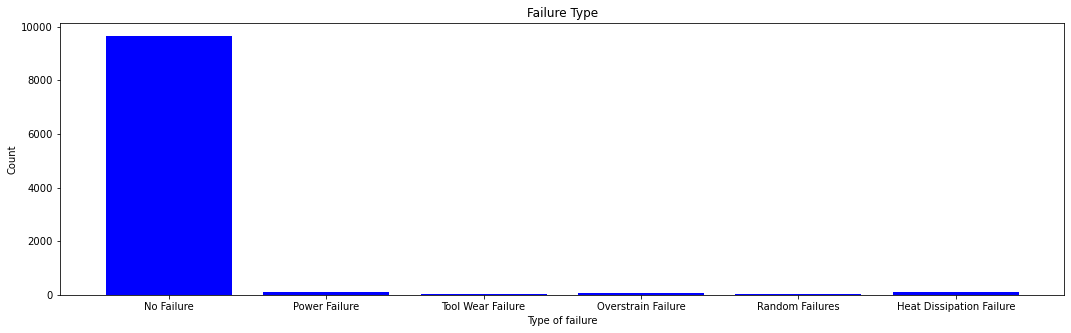

In [12]:
counts = Counter(data['Failure Type'])

labels, values = zip(*counts.items())

# Create the bar chart
plt.figure(figsize=(18,5))
plt.bar(labels, values, color='#0000FF')




# Add a title
plt.title('Failure Type')

# Add axis labels
plt.xlabel('Type of failure')
plt.ylabel('Count')

# Show the plot
plt.show()

# INSIGHT TARGET COLUMN

In [13]:
data['Target'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'



0    96.6%
1     3.4%
Name: Target, dtype: object

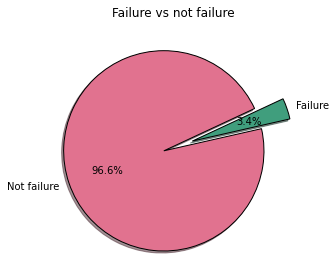

In [14]:
colors = ['#E1728F', '#409E7D'] 
plt.pie(data['Target'].value_counts(),  explode=[0.1, 0.2], labels=['Not failure', 'Failure'],
        autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=25,
        colors=colors)
plt.title('Failure vs not failure')
plt.tight_layout()
plt.show()

# Correlation

<Figure size 1296x504 with 0 Axes>

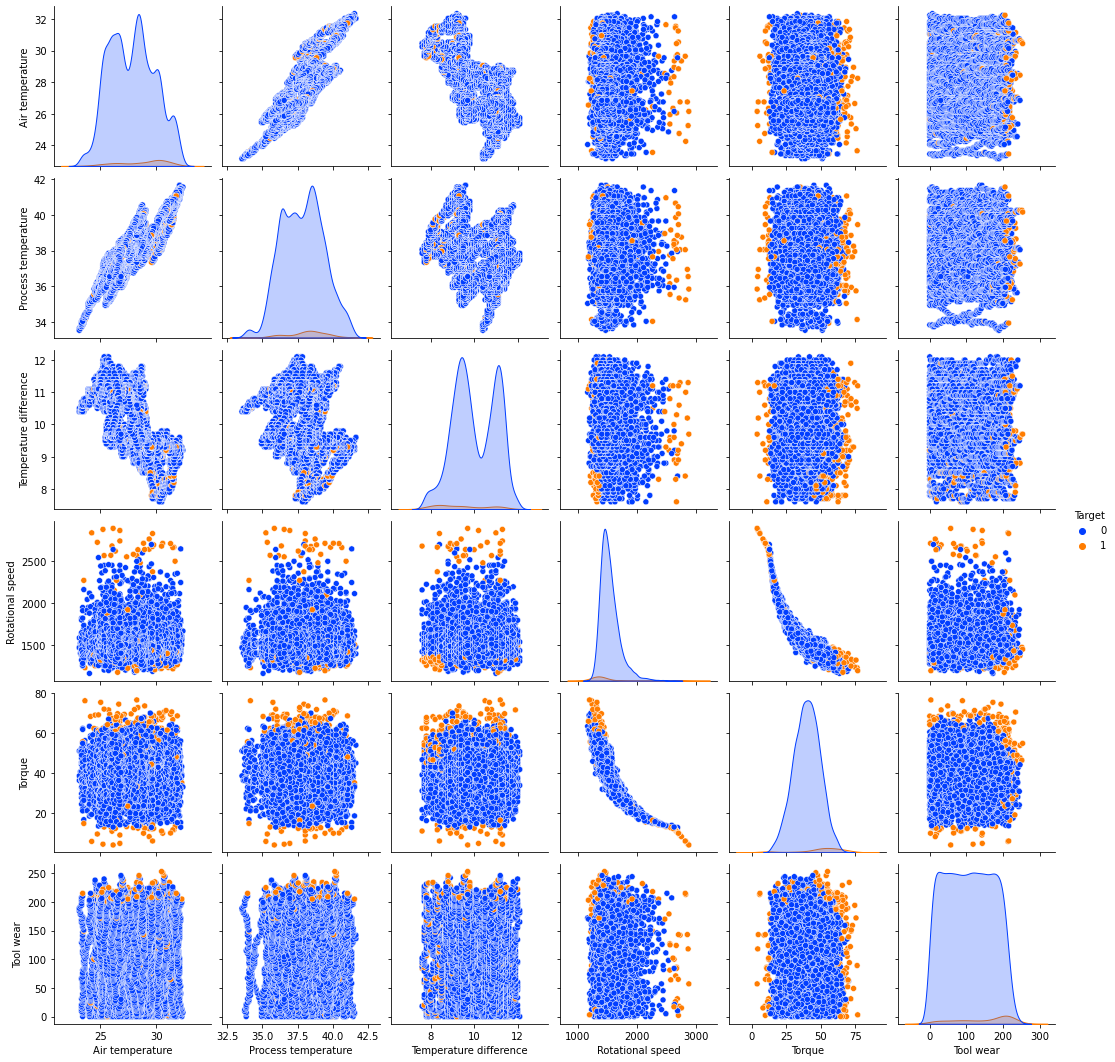

In [15]:
plt.figure(figsize=(18,7))
sns.pairplot(data, hue='Target', palette='bright')

In [16]:
data_failure = data[data['Target'] == 1]
data_failure['Failure Type'].value_counts()

Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: Failure Type, dtype: int64

In [17]:
data_failure = data[data['Target'] == 0]
data_failure['Failure Type'].value_counts()

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

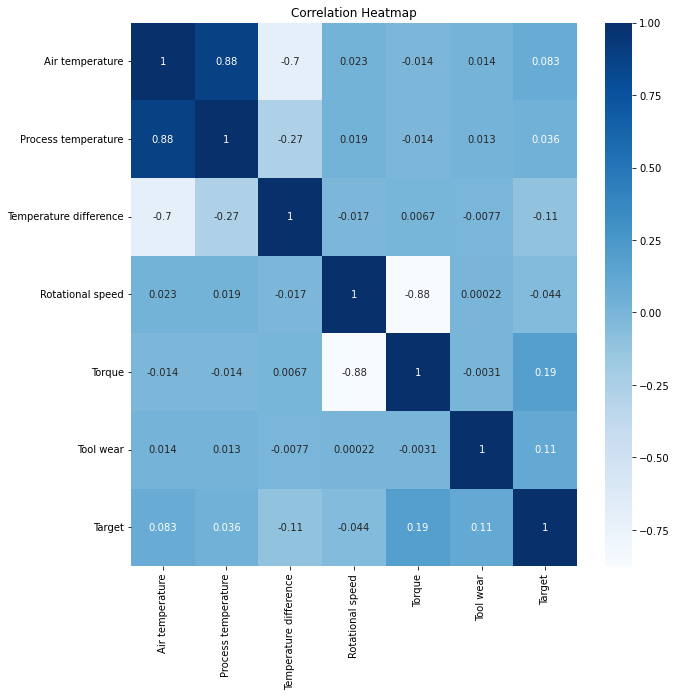

In [18]:
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap="Blues", xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.title("Correlation Heatmap")
plt.show()


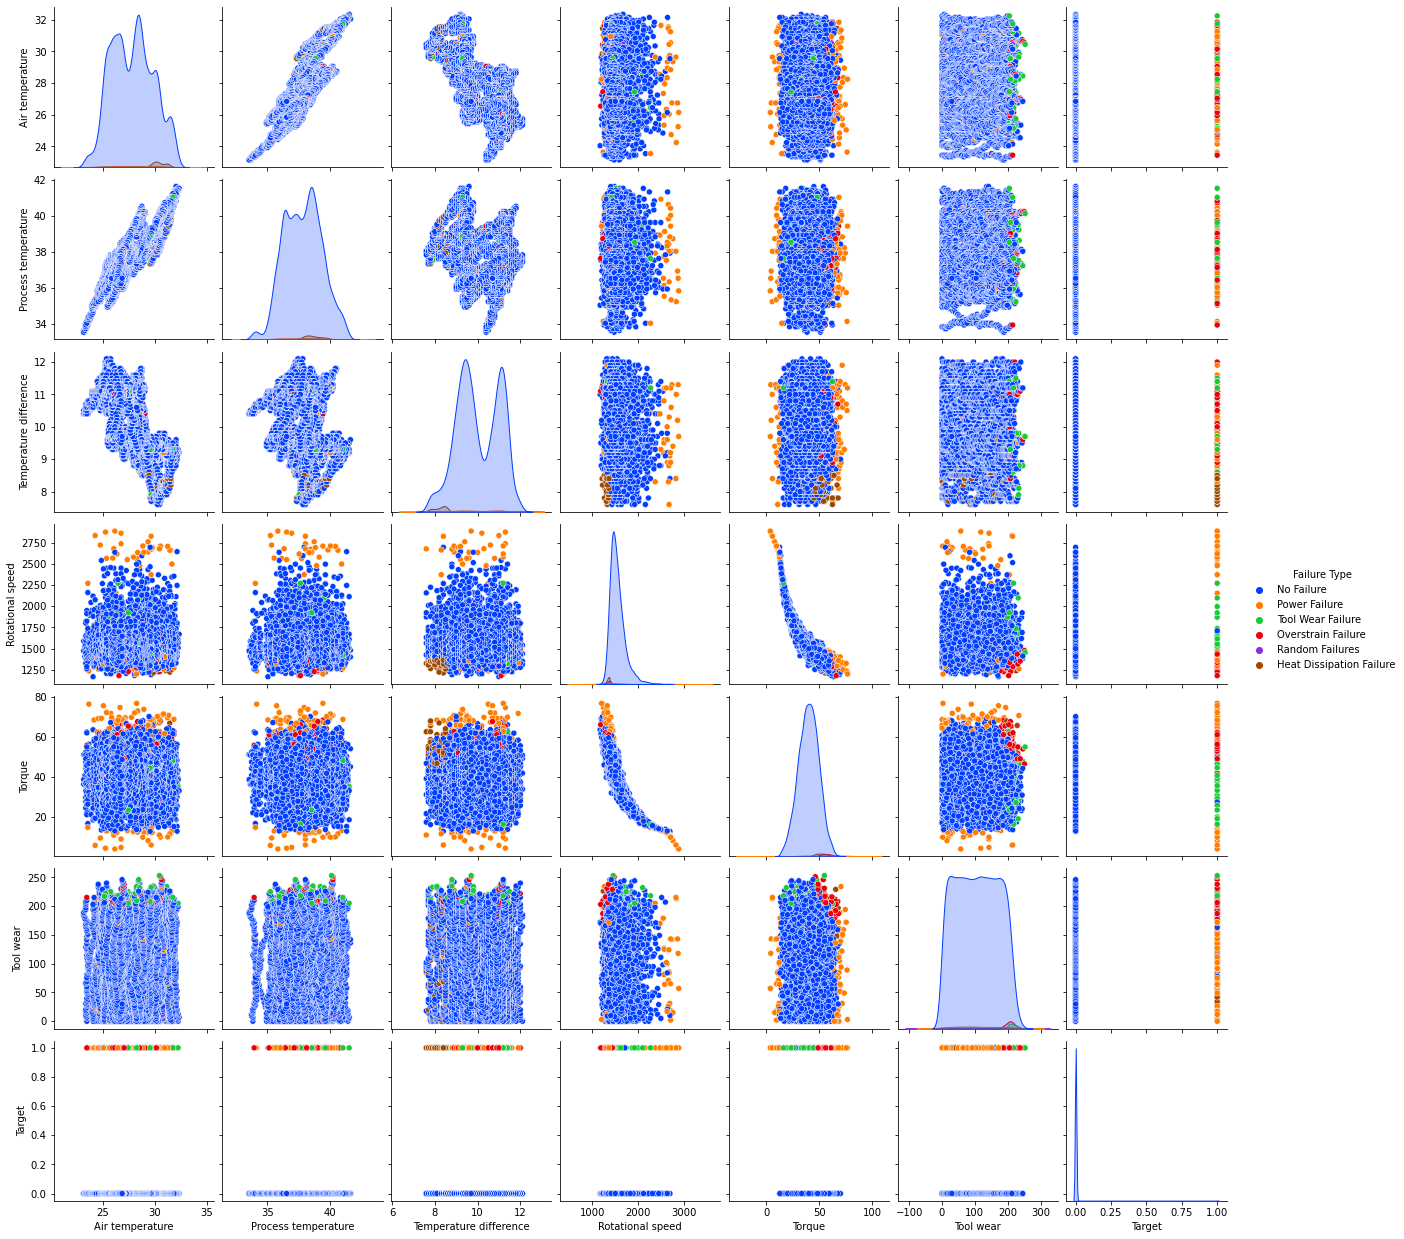

In [19]:
sns.pairplot(data, hue='Failure Type', palette='bright')

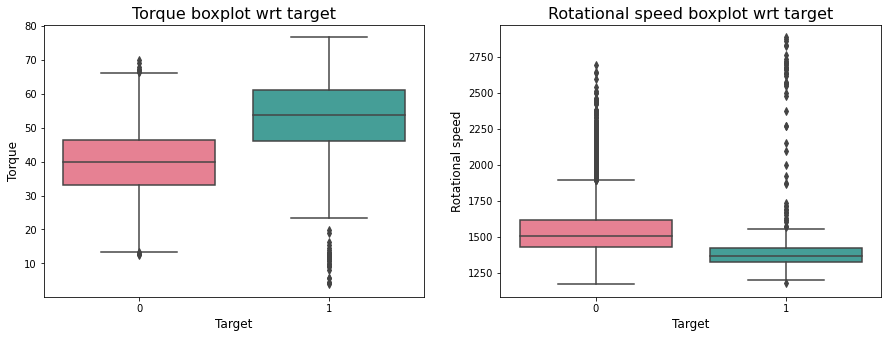

In [20]:
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 16

fig, axes = plt.subplots(1, 2, figsize=[15,5])
axes = axes.flatten()
j=0

for i in ['Torque', 'Rotational speed']:
    sns.boxplot(data=data, x='Target', y=i, ax=axes[j], palette='husl')
    axes[j].set_title(i + ' boxplot wrt target', )
    j += 1

## Product Type

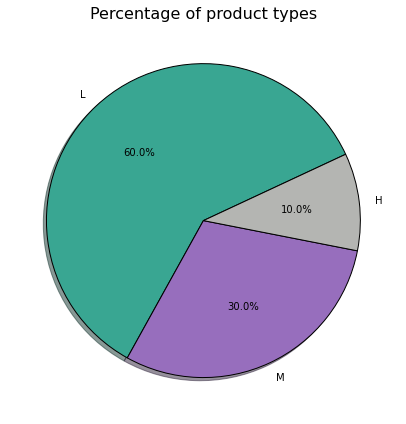

In [21]:
plt.rcParams["figure.figsize"] = (6,6)
colors = ['#39A692', '#976EBD', '#B4B5B2']
plt.pie(data['Type'].value_counts(), labels=['L', 'M', 'H'], colors=colors,
    autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=25)

plt.title('Percentage of product types')
plt.tight_layout()

## Percentage of failure wrt product type

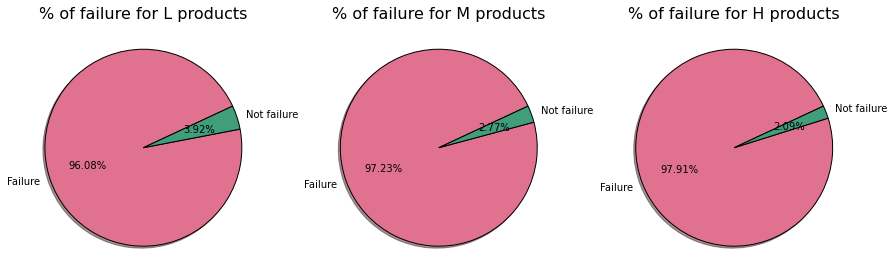

In [22]:
fig, axes = plt.subplots(1,3, figsize=[15,5])
axes.flatten()
j=0
colors = ['#E1728F', '#409E7D'] 
for i in ['L', 'M', 'H']:
    data_product_type = data[data['Type'] == i]
    axes[j].pie(data_product_type['Target'].value_counts(), labels=['Failure', 'Not failure'],
                autopct='%1.2f%%', wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=25,
                colors=colors)
    axes[j].set_title('% of failure for ' + i + ' products')
    j+=1


----- SKEWNESS ------------
Air temperature skewness = 0.11
Process temperature skewness = 0.02
Rotational speed skewness = 1.99
Torque skewness = -0.01
Tool wear skewness = 0.03
---------------------------


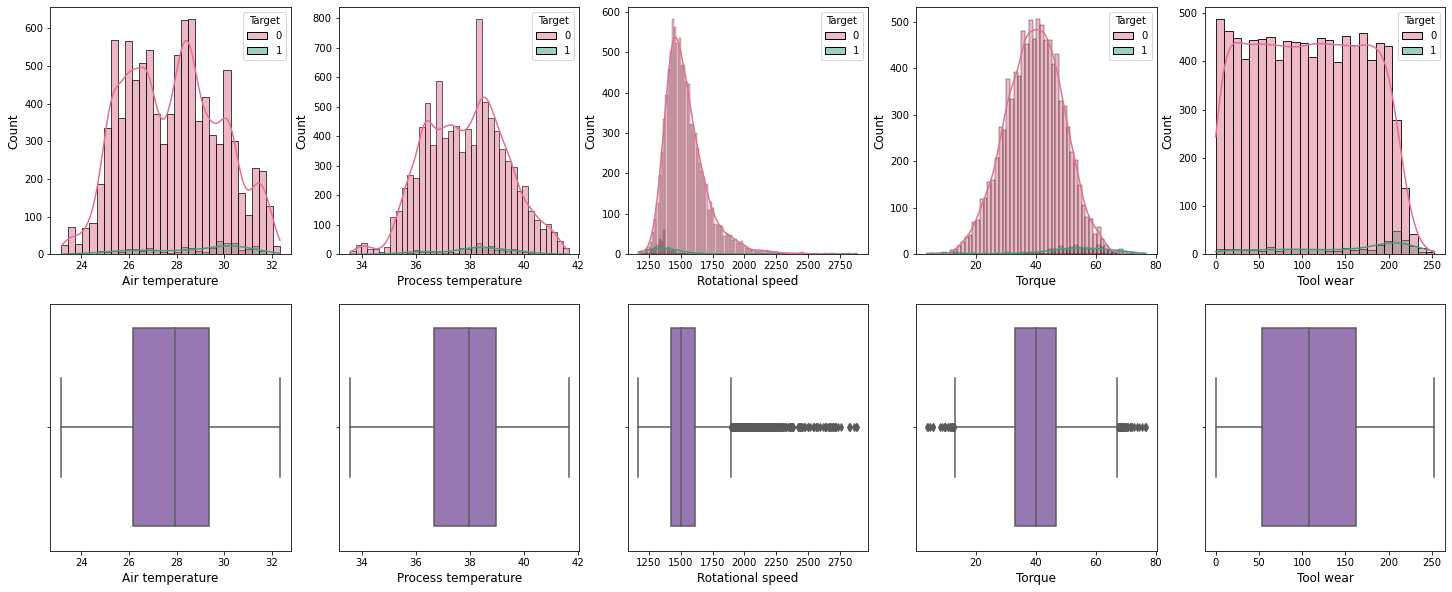

In [23]:
print('----- SKEWNESS ------------')
fig, axes = plt.subplots(2, 5, figsize=[25,10])
j = 0
colors = ['#E1728F', '#409E7D']

for i in ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']:
    sns.histplot(data=data, x=i, kde=True, ax=axes[0,j], hue='Target', palette=colors)
    sns.boxplot(data=data, x=i, ax=axes[1,j], palette=['#976EBD'])
    j+=1
    print('{} skewness = {}'.format(i, round(data[i].skew(), 2)))
print('---------------------------')

# Ordinal Encoding

In [24]:
data_scaled = data.copy()

# Create a LabelEncoder object
encoder = LabelEncoder()

# Select the categorical columns to encode
categorical_columns = data_scaled.select_dtypes(include=['object']).columns

# Encode the categorical columns
data_scaled[categorical_columns] = data_scaled[categorical_columns].apply(encoder.fit_transform)

# Scaling Data

In [25]:
# Select the columns to scale
columns_to_scale = ['Rotational speed', 'Torque']

# Create a RobustScaler object
scaler = RobustScaler()

# Fit the scaler to the data and transform the data
data_scaled[columns_to_scale] = scaler.fit_transform(data_scaled[columns_to_scale])

In [26]:
# Select the columns to scale
cols_to_scale = ['Air temperature', 'Process temperature', 'Tool wear']

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data
scaler.fit(data_scaled[cols_to_scale])

# Transform the data
data_scaled[cols_to_scale] = scaler.transform(data_scaled[cols_to_scale])

In [27]:
data_scaled.sample(10)

,Product ID,Type,Air temperature,Process temperature,Temperature difference,Rotational speed,Torque,Tool wear,Target,Failure Type
4345,8303,2,0.71,0.51,8.00,0.23,-0.02,0.48,0,1
3628,3185,1,0.75,0.70,9.20,0.56,-0.59,0.16,0,1
3707,8099,2,0.74,0.69,9.20,-0.03,-0.13,0.11,0,1
2728,2647,1,0.48,0.44,9.60,1.46,-1.07,0.51,0,1
2928,7855,2,0.60,0.49,8.90,-1.30,1.09,0.66,0,1
7672,9315,2,0.57,0.74,11.20,3.38,-1.68,0.77,0,1
1429,7415,2,0.39,0.53,11.10,-0.25,0.27,0.06,0,1
7069,5246,1,0.60,0.62,9.90,0.12,-0.05,0.69,0,1
3898,8164,2,0.74,0.67,9.00,-0.42,-0.24,0.32,0,1
7313,5394,1,0.50,0.58,10.50,-0.50,-0.13,0.57,0,1


# Models with 'Target' variable

In [28]:
X = data_scaled.drop(['Target', 'Failure Type', 'Product ID'], axis=1)
y = data_scaled['Target']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.5,random_state=123)

In [29]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the classifier to the data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# View the results
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  5.84it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.98               0.82     0.82      0.98   
LGBMClassifier                     0.98               0.81     0.81      0.98   
BaggingClassifier                  0.98               0.81     0.81      0.98   
DecisionTreeClassifier             0.98               0.79     0.79      0.98   
RandomForestClassifier             0.98               0.76     0.76      0.98   
NearestCentroid                    0.71               0.73     0.73      0.80   
AdaBoostClassifier                 0.97               0.73     0.73      0.97   
ExtraTreesClassifier               0.98               0.71     0.71      0.97   
LabelSpreading                     0.97               0.70     0.70      0.96   
LabelPropagation                   0.97               0.70     0.70      0.96   
ExtraTreeClassifier         

In [31]:
from xgboost import XGBClassifier
# Create the XGBoost classifier
xgb_clf = XGBClassifier()

# Fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = xgb_clf.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


# Saving Models

In [32]:
#with open("Bagging_binary.pkl","wb") as files:
 #   pickle.dump(bag_model,files)
#with open("RandomForest_binary.pkl","wb") as files:
 #   pickle.dump(rf_model,files)
#with open("BalancedBagging_binary.pkl","wb") as files:
#    pickle.dump(bal_bag_model,files)

# Modeling with 'Failure Type' Target

In [33]:
X = data.drop(['Target', 'Failure Type', 'Product ID'], axis=1)
y = data['Target']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.5,random_state=123)

In [34]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the classifier to the data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# View the results
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  5.88it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.98               0.82     0.82      0.98   
LGBMClassifier                     0.99               0.81     0.81      0.98   
BaggingClassifier                  0.98               0.81     0.81      0.98   
DecisionTreeClassifier             0.98               0.80     0.80      0.98   
RandomForestClassifier             0.98               0.77     0.77      0.98   
ExtraTreesClassifier               0.98               0.73     0.73      0.98   
ExtraTreeClassifier                0.96               0.73     0.73      0.96   
NearestCentroid                    0.71               0.73     0.73      0.80   
AdaBoostClassifier                 0.97               0.73     0.73      0.97   
LabelSpreading                     0.97               0.70     0.70      0.96   
LabelPropagation            